In [1]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
dataset = pd.read_csv('data.txt', sep=",", header=None, names=["Size", "Bedrooms", "Price"])
dataset = dataset.to_numpy()

In [3]:
features_X = dataset[:, :-1]
target_y = dataset[:, -1:]

In [4]:
features_X.shape

(47, 2)

In [5]:
target_y.shape

(47, 1)

In [6]:
print(len(features_X))

47


In [7]:
print(len(target_y))

47


In [8]:
m = len(target_y)

In [9]:
def featureNormalize(X):
    mu = np.mean(features_X, axis=0)
    sigma = np.std(features_X, axis=0)
    X_norm = (X - mu) / sigma
    return mu, sigma, X_norm
    
mu, sigma, features_X = featureNormalize(features_X)
features_X = np.concatenate((np.ones((m, 1), dtype=np.int8), features_X), axis=1)    

In [10]:
def computeCost(features_X, target_y, theta):
    J = 0
    hypothesis_func = np.dot(features_X, theta)
    sqr_errors = np.power((hypothesis_func - target_y), 2)
    J = (1 /(2 * m)) * np.sum(sqr_errors)
    return J

In [11]:
iterations = 400;
learning_rate = 0.01;

In [12]:
def gradientDescent(features_X, target_y, theta, learning_rate, iterations):
    cost_hist = np.zeros(iterations)
    theta_hist = np.zeros((iterations, 2))
    
    for iteration in range(iterations):
        prediction = features_X.dot(theta)
        theta = theta - (1 / m) * learning_rate * (features_X.T.dot((prediction - target_y)))
        cost_hist[iteration] = computeCost(features_X, target_y, theta)
        
    return theta, cost_hist

In [13]:
theta = np.zeros((3,1))
theta, cost_values = gradientDescent(features_X, target_y, theta, learning_rate, iterations)

In [14]:
plt.style.use('seaborn-whitegrid')

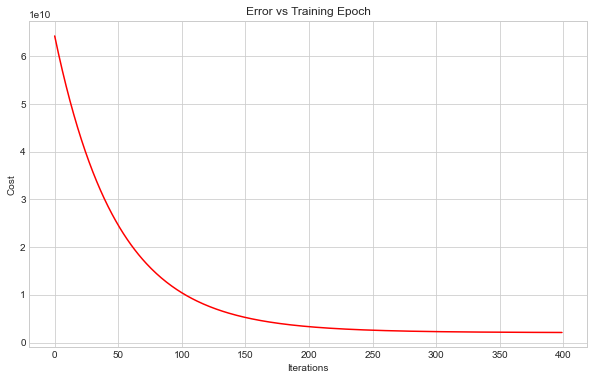

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(cost_values, '-', c="red")
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training Epoch')
plt.show()


### The cost (error) of the solution decreases with each training epoch. This shows that gradient descent worked properly and our algorithm worked.

In [16]:
mu[0]

2000.6808510638298

In [17]:
sigma[0]


786.2026187430467

In [18]:
temp = np.array([[1, 1650, 3]], dtype='f')
a = (temp[0][1] - mu[0]) / sigma[0]
b = (temp[0][2] - mu[1]) / sigma[1]
temp[0, 1] = a
temp[0, 2] = b
a, b

(-0.4460438603276164, -0.2260933675776883)

In [19]:
temp

array([[ 1.        , -0.44604385, -0.22609337]], dtype=float32)

In [20]:
(temp[0][1] - mu[0]) / sigma[0]

-2.5453068295704138